# The Large Hardron Collider simulated data to search for stadard model Higgs bosons


    
    

### Experiment
The Large Hadron Collider (LHC) is the world’s largest and most powerful particle accelerator to this date. It consists of a 27-kilometer ring of superconducting magnets and it gives an energy boost to the particles that move along this ring.
These particles travel along the ring as a particle beam and two beams are traveling in the opposite direction tube inside this accelerator. These beams are made to collide with each other at certain points inside the accelerator. The LHC is used to study different types of particles but this report focuses on the LHC data to search for the Higgs bosons in proton-to-proton collisions at center-of-mass energy at 13 TeV.

When this collision happens, the constituents of these protons(quarks and gluons) interact with one another and these high-energy interactions produce Higgs bosons. To probe for the wide range of possible Higgs boson mass the luminosity must be high, but this high luminosity causes the detector to collect high counts of background collisions as well. This is one issue associated with the data collected from the LHC. Furthermore, these bosons decay immediately and cannot be detected directly, instead these decays are reconstructed from the calorimeter jets. According to the paper [	arXiv:1901.10342], "jets are collimated flows of hadrons and they can be seen as proxies to the high-energy quarks and gluons produced in a collision."

Understanding the jet structures and using jet structure tools is helpful in discrimination; between a boosted jet originated from a boson and a standard QCD background.


### Analysis

For this analysis, I am using two sets of data: Higgs and QCD. Each file contains 100k jets. The Higgs file contains the signal data and the QCD file contains the background data. Each file contains data associated with 14 different parameters. To make these data sets useful, I need to identify the parameters which will help me discriminate the background from the signal data.  

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

### Pseudo-experiment data

In [3]:
# importing the data file higgs_100000_pt_250_500.h5'
hf = h5py.File('higgs_100000_pt_250_500.h5', 'r')
hf.keys()


<KeysViewHDF5 ['higgs_100000_pt_250_500']>

In [4]:
higgs = np.array(hf.get('higgs_100000_pt_250_500'))
hf.close()

In [5]:
# importing the data file qcd_100000_pt_250_500.h5
hf = h5py.File('qcd_100000_pt_250_500.h5', 'r')
hf.keys()

<KeysViewHDF5 ['qcd_100000_pt_250_500']>

In [6]:
qcd_bkg = np.array(hf.get('qcd_100000_pt_250_500'))
hf.close()

In [7]:
print(higgs.shape)
print(qcd_bkg.shape)
print(higgs[0, 0:50])
print(qcd_bkg[0, 0:50])

(100000, 14)
(100000, 14)
[ 4.72074292e+02  1.37051933e-01 -2.53514528e+00  1.25150365e+02
  1.26581144e-01  2.63262173e-03  1.29802008e+00  8.21783249e-03
  7.39786850e-01  2.83688949e-01  1.74943644e-01  3.83473901e-01
  6.16674158e-01  5.57406805e-01]
[4.89631389e+02 1.95596873e+00 1.80300673e+00 1.25298720e+02
 9.94094435e-02 3.24667974e-03 3.30488630e+00 5.28395872e-04
 8.46096234e-01 5.86657555e-01 4.39468181e-01 6.93369775e-01
 7.49105125e-01 3.33730783e-01]


### Importing training sample data

In [8]:
# import library
import pickle

# open the file of interest, and use pickle loading
infile = open ("higgs_100000_pt_250_500.pkl",'rb')
higgs = pickle.load(infile)

# list all keys of the files
higgs.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [9]:
# import library
import pickle

# open the file of interest, and use pickle loading
infile2 = open ("qcd_100000_pt_250_500.pkl",'rb')
qcd = pickle.load(infile2)

# list all keys of the files
qcd.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [10]:
# Print two variables, mass and d2, of the first 10 jets
for i in range(10):
 print(higgs['mass'][i],higgs['d2'][i])

125.15036485403486 1.2980200835589373
130.55267214662751 1.445626317832899
125.70306309880351 0.986596849742669
126.21585336608149 1.2184665392866647
132.18250371689544 1.2917844364435773
125.67653506886116 0.4343656746345235
127.65400794990293 0.9312049446719695
124.16656852260293 0.9493560863407668
122.13035265114684 3.0022665455324082
125.19144633816678 0.5539996032675585


In [11]:
# Print two variables, mass and d2, of the first 10 jets
for i in range(10):
 print(qcd['mass'][i],qcd['d2'][i])

125.29872026896659 3.304886302915122
88.0470543065784 2.4390891450626166
85.79417445424248 4.118371457491606
42.94732814665354 8.038338215316234
59.54222652643443 6.353842223846714
52.25202892050295 35.22466496007628
87.72005721179889 3.8934825497044394
59.648628855244354 8.789222507192793
74.23631116158323 3.2765540773471997
41.90450338556174 26.87568501726949


In [12]:
# printing out the first 10 elements of each sub-data to see what they contain 
print('{:13}{:10}{:10}{:10}{:10}{:10}{:10}'.format('pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2'))

for i in range(10):
 print('{:.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}'.format(higgs['pt'][i], higgs['eta'][i], higgs['phi'][i], higgs['mass'][i], higgs['ee2'][i], 
      higgs['ee3'][i], higgs['d2'][i]))

pt           eta       phi       mass      ee2       ee3       d2        
472.0743    0.1371   -2.5351  125.1504    0.1266    0.0026    1.2980
470.4057   -0.0392    0.0697  130.5527    0.1181    0.0024    1.4456
438.0084   -0.1811   -3.0311  125.7031    0.1673    0.0046    0.9866
484.8604    0.2520    2.8557  126.2159    0.1192    0.0021    1.2185
486.1411   -1.9178   -2.2220  132.1825    0.1036    0.0014    1.2918
475.7986    1.6790    0.3091  125.6765    0.1449    0.0013    0.4344
470.8149   -2.1232   -3.0343  127.6540    0.1587    0.0037    0.9312
471.7346    1.5648   -2.5790  124.1666    0.1441    0.0028    0.9494
483.0434    1.0580    0.2379  122.1304    0.0983    0.0029    3.0023
484.3594    1.0767    1.8519  125.1914    0.1358    0.0014    0.5540


Here you can see the first 10 values from each of the parameter.
From this printout I can get a feeling for what kind of values each parameter can take, but it is not enough to help me understand what they mean.

In [13]:
# printing out the first 10 elements of each sub-data to see what they contain
print('{:13}{:10}{:10}{:10}{:8}{:8}{:8}'.format('angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'))

for i in range(10):
 print('{:.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}'.format(higgs['angularity'][i] ,higgs['t1'][i],
       higgs['t2'][i], higgs['t3'][i], higgs['t21'][i], higgs['t32'][i], higgs['KtDeltaR'][i]))

angularity   t1        t2        t3        t21     t32     KtDeltaR
0.0082    0.7398    0.2837    0.1749    0.3835    0.6167    0.5574
0.0138    0.7479    0.2343    0.1934    0.3132    0.8253    0.7047
0.0045    1.0014    0.4405    0.2186    0.4399    0.4963    0.4875
0.0067    0.7619    0.2282    0.1938    0.2995    0.8494    0.5949
0.0004    0.7227    0.1669    0.1481    0.2309    0.8875    0.6781
0.0001    1.0892    0.0950    0.0865    0.0872    0.9107    0.5072
0.0001    1.0727    0.4041    0.1286    0.3767    0.3184    0.4674
0.0004    1.0467    0.2581    0.2057    0.2465    0.7970    0.4777
0.0031    0.7627    0.4025    0.2243    0.5277    0.5573    0.1940
0.0006    1.0284    0.1071    0.0862    0.1042    0.8046    0.4940


### Explanation of the 14 parameters

From the document [Eur. Phys. J. C 79 (2019) 836] and from the references, I understand the 14 parameters to be as follows:

pt = the transverse momentum, in GeV

eta = the pseudorapidity

phi = the azimuthal angle measured around the beam axis z

mass = invariant mass, in GeV

ee2 = the i-th energy correlation function. This is for 2-point correlators

ee3 = the i-th energy correlation function. This is for 3-point correlators

d2 = the ratio of the energy correlation function ee2 and ee3

angularity = describes the symmetry of the jet decay shape. It is largely uncorrelated with all of the other observables.

t1 = N-subjettiness, τ1 

t2 = N-subjettiness, τ2

t3 = N-subjettiness, τ3

t21 = the ratio of τ2/τ1 

t32 = the ratio of τ3/τ2 

KtDeltaR = ∆R of two subjets within the large-R jet where ∆R is the angular distance between the constituents

#### The importance of Jets and N-subjettiness
Jet algorithms collect groups of particles based on common property, and it helps us in distinguishing these particles from ordinary QCDs. The shape of the jet depends on the type of parton (quark or gluon) and is also sensitive to non-perturbative fragmentation effects and underlying event contributions from the interaction between proton remnants. Properly modelling these soft contribution helps in understanding the jet production and for comparison of the jet cross section measurement with QCD theoretical predictions.

N-subjettiness is designed to identify boosted N-prong hadronic decays. This is the quantity that describes the degree to which jet radiation is alighed along specified axes. Small values of N-subjettines correspond to N or fewer subjects while large values correspond to N or more subjects. The ratio of two N-subjettiness are shown to have a strong discriminating power for different particles. t32 is shown to have a great discriminating power for boosted top and t21 is successful at identifying boosted W, Z and Higgs bosons.


# Scatter plots: Compare the higgs data and the qcd background data

I am plotting scatter plots for each parameters (higgs vs qcd) to compare the shape of each data set and to see how they behave.

In [14]:
# first plot the signal data then plot the background data

start = 0 
end = 2000

pt = higgs['pt'][start:end]
eta = higgs['eta'][start:end]
phi = higgs['phi'][start:end]
mass = higgs['mass'][start:end]
ee2 = higgs['ee2'][start:end]
ee3 = higgs['ee3'][start:end]
d2 = higgs['d2'][start:end]
angularity = higgs['angularity'][start:end]
t1 = higgs['t1'][start:end]
t2 = higgs['t2'][start:end]
t3 = higgs['t3'][start:end]
t21 = higgs['t21'][start:end]
t32 = higgs['t32'][start:end]
delta_R = higgs['KtDeltaR'][start:end]

pt_bkg = qcd['pt'][start:end]
eta_bkg = qcd['eta'][start:end]
phi_bkg = qcd['phi'][start:end]
mass_bkg = qcd['mass'][start:end]
ee2_bkg = qcd['ee2'][start:end]
ee3_bkg = qcd['ee3'][start:end]
d2_bkg = qcd['d2'][start:end]
angularity_bkg = qcd['angularity'][start:end]
t1_bkg = qcd['t1'][start:end]
t2_bkg = qcd['t2'][start:end]
t3_bkg = qcd['t3'][start:end]
t21_bkg = qcd['t21'][start:end]
t32_bkg = qcd['t32'][start:end]
delta_R_bkg = qcd['KtDeltaR'][start:end]

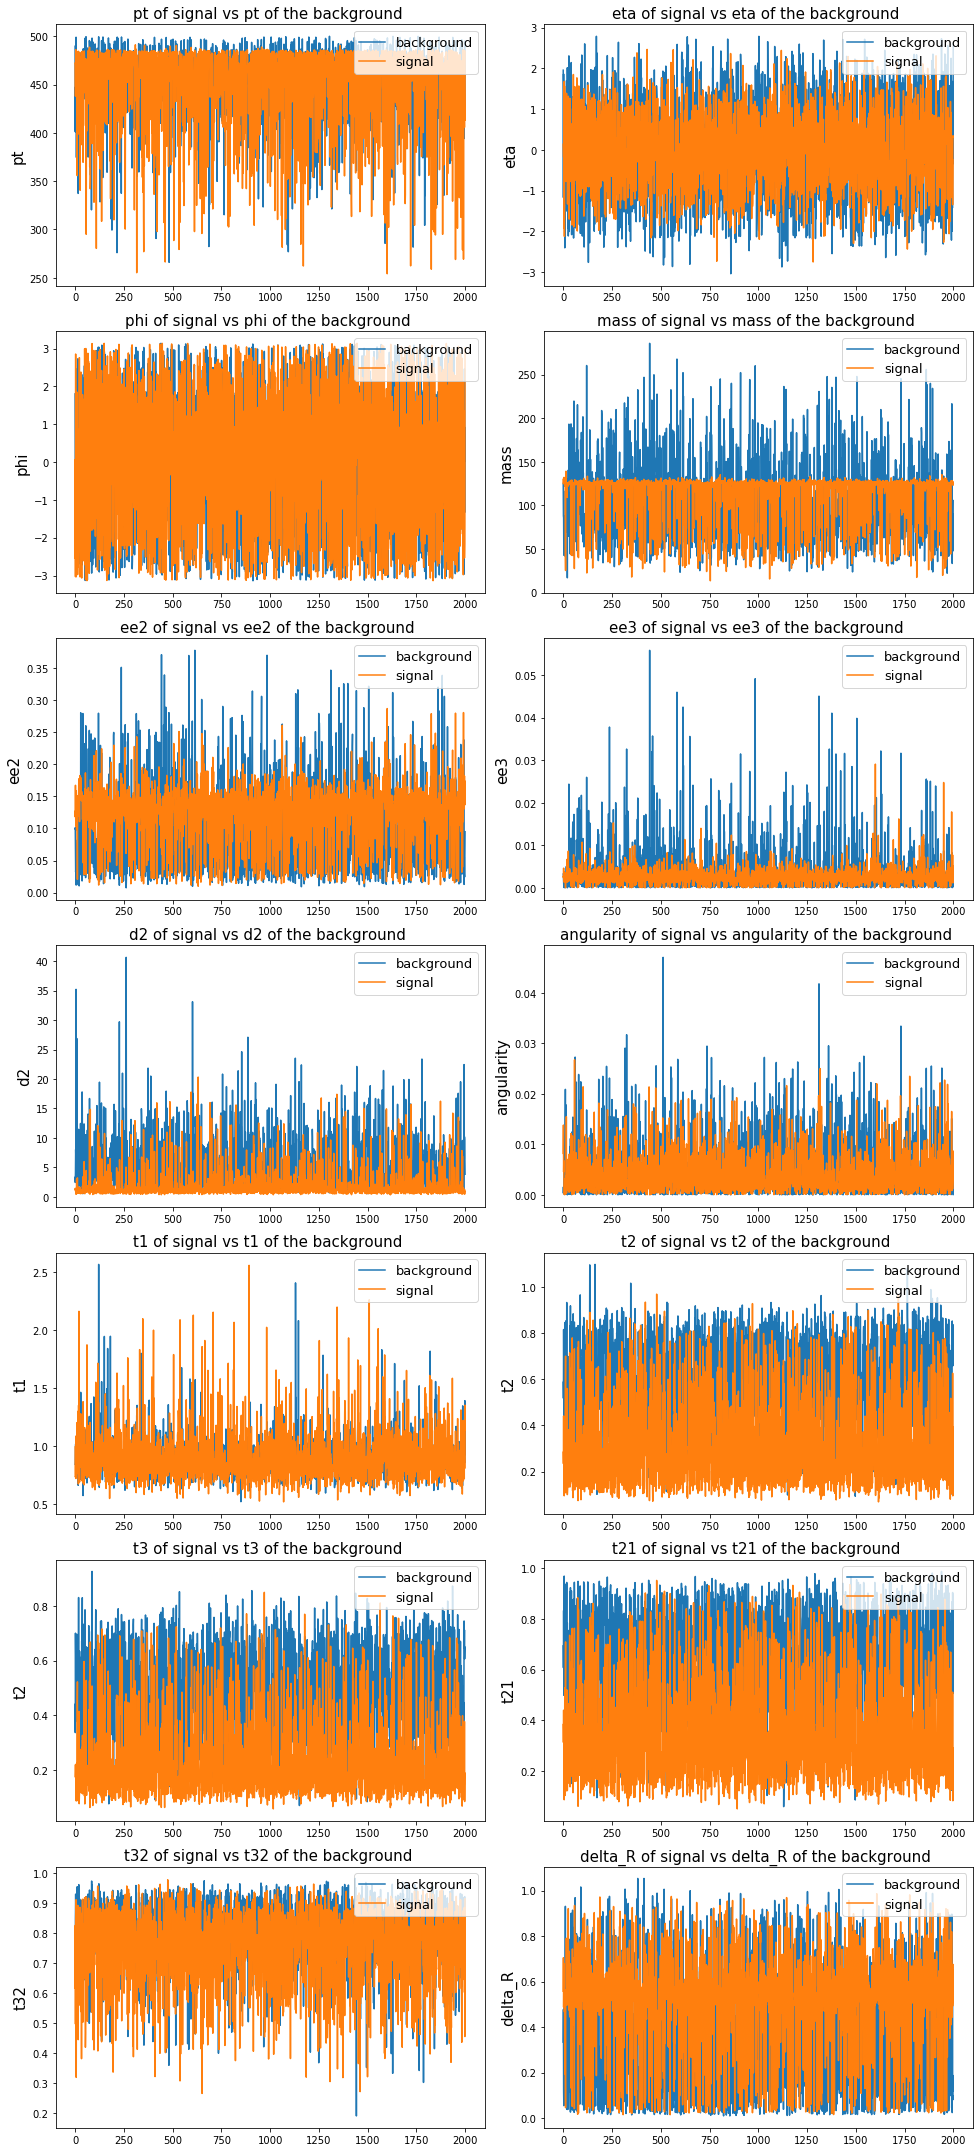

In [15]:
fig, axes = plt.subplots(7,2,figsize=(14,30))

size = 15
leg_size = 13

axes[0,0].plot(pt_bkg, label = 'background')
axes[0,0].plot(pt,label = 'signal')
axes[0,0].set_ylabel('pt', fontsize = size)
axes[0,0].set_title("pt of signal vs pt of the background ", fontsize=size)
axes[0,0].legend(loc=1, fontsize=leg_size)

axes[0,1].plot(eta_bkg, label = 'background')
axes[0,1].plot(eta, label = 'signal')
axes[0,1].set_ylabel('eta', fontsize=size)
axes[0,1].set_title("eta of signal vs eta of the background ", fontsize=size)
axes[0,1].legend(loc=1, fontsize=leg_size)

axes[1,0].plot(phi_bkg, label = 'background')
axes[1,0].plot(phi, label = 'signal')
axes[1,0].set_ylabel('phi', fontsize=size)
axes[1,0].set_title("phi of signal vs phi of the background ", fontsize=size)
axes[1,0].legend(loc=1, fontsize=leg_size)

axes[1,1].plot(mass_bkg, label = 'background')
axes[1,1].plot(mass,label = 'signal')
axes[1,1].set_ylabel('mass', fontsize=size)
axes[1,1].set_title("mass of signal vs mass of the background ", fontsize=size)
axes[1,1].legend(loc=1, fontsize=leg_size)

axes[2,0].plot(ee2_bkg,label = 'background')
axes[2,0].plot(ee2,label = 'signal')
axes[2,0].set_ylabel('ee2', fontsize=size)
axes[2,0].set_title("ee2 of signal vs ee2 of the background ", fontsize=size)
axes[2,0].legend(loc=1, fontsize=leg_size)

axes[2,1].plot(ee3_bkg, label = 'background')
axes[2,1].plot(ee3, label = 'signal')
axes[2,1].set_ylabel('ee3', fontsize=size)
axes[2,1].set_title("ee3 of signal vs ee3 of the background ", fontsize=size)
axes[2,1].legend(loc=1, fontsize=leg_size)

axes[3,0].plot(d2_bkg, label = 'background')
axes[3,0].plot(d2, label = 'signal')
axes[3,0].set_ylabel('d2', fontsize=size)
axes[3,0].set_title("d2 of signal vs d2 of the background ", fontsize=size)
axes[3,0].legend(loc=1, fontsize=leg_size)

axes[3,1].plot(angularity_bkg, label = 'background')
axes[3,1].plot(angularity, label = 'signal')
axes[3,1].set_ylabel('angularity', fontsize=size)
axes[3,1].set_title("angularity of signal vs angularity of the background ", fontsize=size)
axes[3,1].legend(loc=1, fontsize=leg_size)

axes[4,0].plot(t1_bkg, label = 'background')
axes[4,0].plot(t1, label = 'signal')
axes[4,0].set_ylabel('t1', fontsize=size)
axes[4,0].set_title("t1 of signal vs t1 of the background ", fontsize=size)
axes[4,0].legend(loc=1, fontsize=leg_size)

axes[4,1].plot(t2_bkg, label = 'background')
axes[4,1].plot(t2, label = 'signal')
axes[4,1].set_ylabel('t2', fontsize=size)
axes[4,1].set_title("t2 of signal vs t2 of the background ", fontsize=size)
axes[4,1].legend(loc=1, fontsize=leg_size)

axes[5,0].plot(t3_bkg, label = 'background')
axes[5,0].plot(t3, label = 'signal')
axes[5,0].set_ylabel('t2', fontsize=size)
axes[5,0].set_title("t3 of signal vs t3 of the background ", fontsize=size)
axes[5,0].legend(loc=1, fontsize=leg_size)

axes[5,1].plot(t21_bkg, label = 'background')
axes[5,1].plot(t21, label = 'signal')
axes[5,1].set_ylabel('t21', fontsize=size)
axes[5,1].set_title("t21 of signal vs t21 of the background ", fontsize=size)
axes[5,1].legend(loc=1, fontsize=leg_size)

axes[6,0].plot(t32_bkg, label = 'background')
axes[6,0].plot(t32, label = 'signal')
axes[6,0].set_ylabel('t32', fontsize=size)
axes[6,0].set_title("t32 of signal vs t32 of the background ", fontsize=size)
axes[6,0].legend(loc=1, fontsize=leg_size)

axes[6,1].plot(delta_R_bkg, label = 'background')
axes[6,1].plot(delta_R, label = 'signal')
axes[6,1].set_ylabel('delta_R', fontsize=size)
axes[6,1].set_title("delta_R of signal vs delta_R of the background ", fontsize=size)
axes[6,1].legend(loc=1, fontsize=leg_size)

fig.tight_layout()

The scatter plots gives us a quick comparison between the signal data and the background data and it gives us some idea about which parameters to choose among the 14 parameters. However, it is also good to look at the data from different prospective so I plotted the histograms for all 14 parameters.

## Histograms: Compare the higgs data and the qcd background data

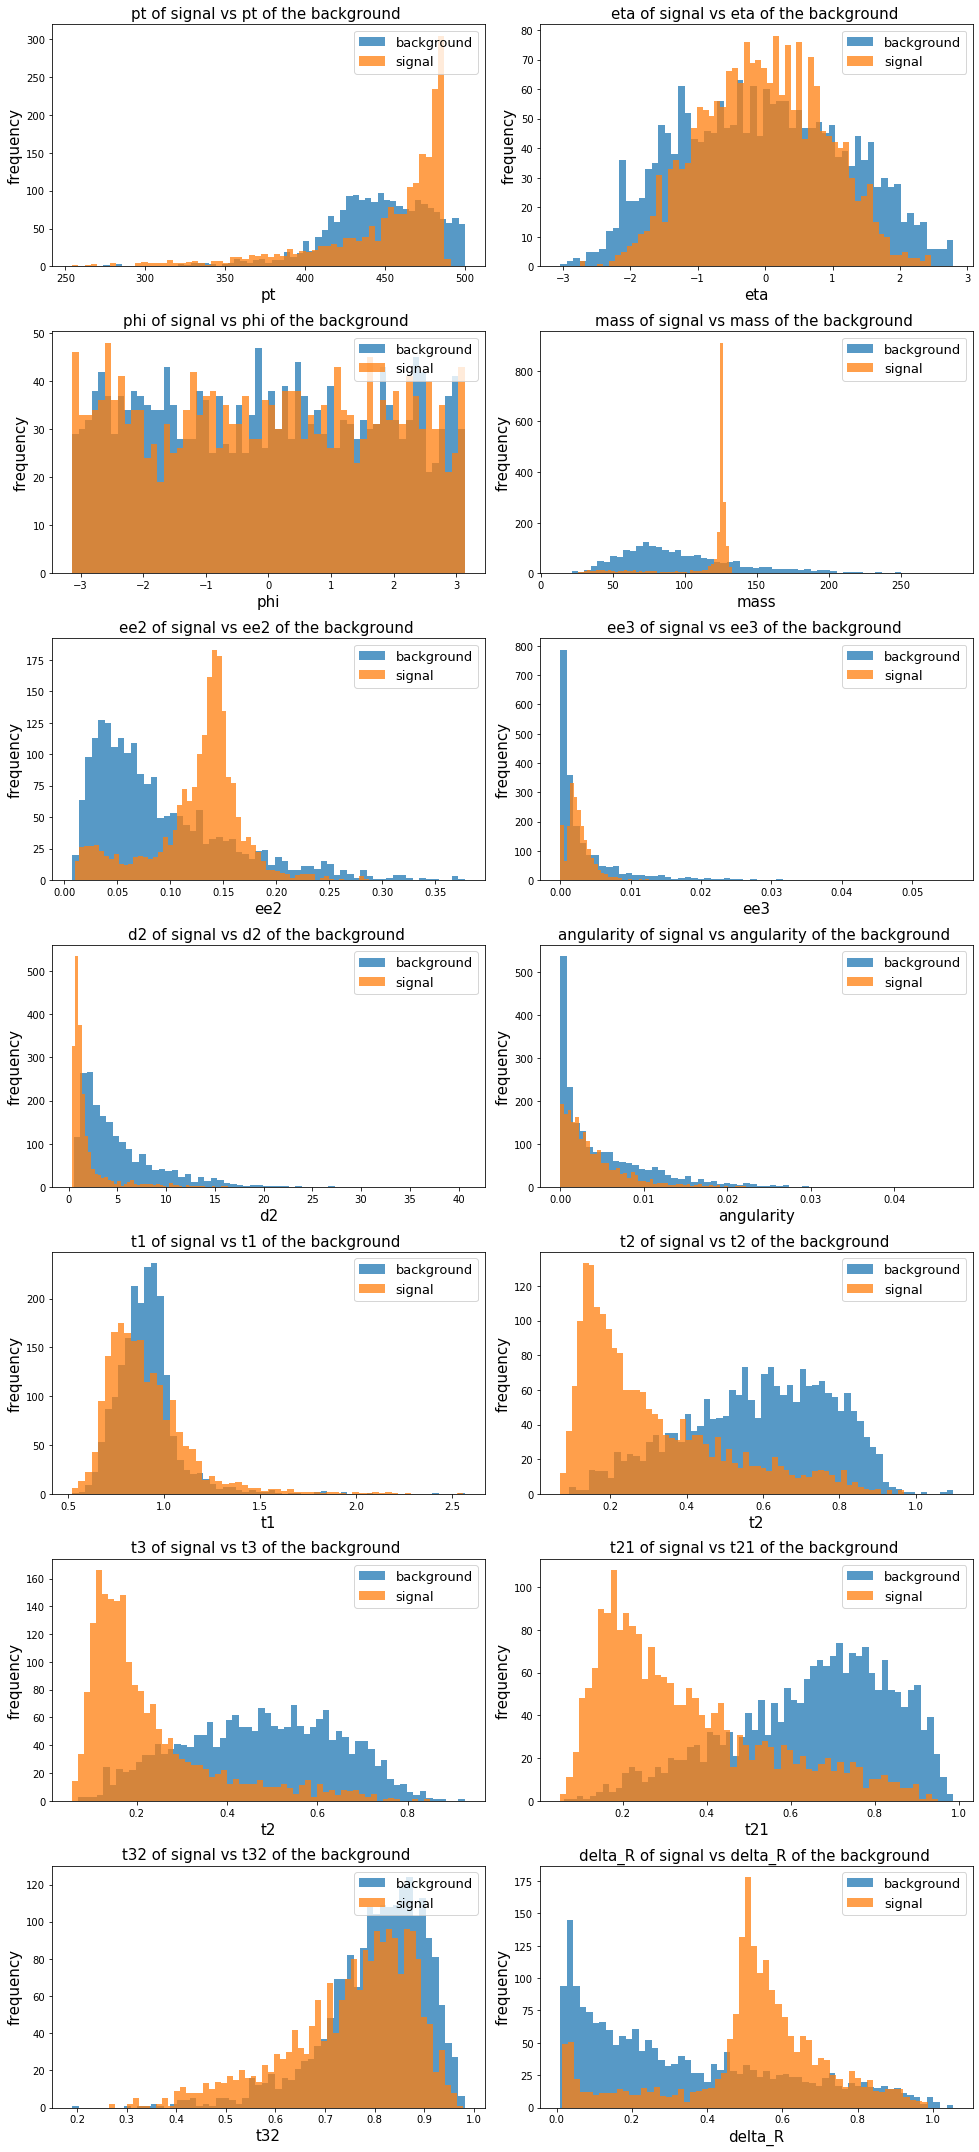

In [21]:
fig, axes = plt.subplots(7,2,figsize=(14,30))

alpha_n = 0.75
bin_size = 60
size = 15
leg_size = 13

axes[0,0].hist(pt_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[0,0].hist(pt,label = 'signal', bins = bin_size, alpha=alpha_n)
axes[0,0].set_xlabel('pt', fontsize = size)
axes[0,0].set_ylabel('frequency', fontsize = size)
axes[0,0].set_title("pt of signal vs pt of the background ", fontsize=size)
axes[0,0].legend(loc=1, fontsize=leg_size)

axes[0,1].hist(eta_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[0,1].hist(eta, label = 'signal', bins = bin_size, alpha=alpha_n)
axes[0,1].set_xlabel('eta', fontsize=size)
axes[0,1].set_ylabel('frequency', fontsize=size)
axes[0,1].set_title("eta of signal vs eta of the background ", fontsize=size)
axes[0,1].legend(loc=1, fontsize=leg_size)

axes[1,0].hist(phi_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[1,0].hist(phi, label = 'signal', bins = bin_size, alpha=alpha_n)
axes[1,0].set_xlabel('phi', fontsize=size)
axes[1,0].set_ylabel('frequency', fontsize=size)
axes[1,0].set_title("phi of signal vs phi of the background ", fontsize=size)
axes[1,0].legend(loc=1, fontsize=leg_size)

axes[1,1].hist(mass_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[1,1].hist(mass,label = 'signal', bins = bin_size, alpha=alpha_n)
axes[1,1].set_xlabel('mass', fontsize=size)
axes[1,1].set_ylabel('frequency', fontsize=size)
axes[1,1].set_title("mass of signal vs mass of the background ", fontsize=size)
axes[1,1].legend(loc=1, fontsize=leg_size)

axes[2,0].hist(ee2_bkg,label = 'background', bins = bin_size, alpha=alpha_n)
axes[2,0].hist(ee2,label = 'signal', bins = bin_size, alpha=alpha_n)
axes[2,0].set_xlabel('ee2', fontsize=size)
axes[2,0].set_ylabel('frequency', fontsize=size)
axes[2,0].set_title("ee2 of signal vs ee2 of the background ", fontsize=size)
axes[2,0].legend(loc=1, fontsize=leg_size)

axes[2,1].hist(ee3_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[2,1].hist(ee3, label = 'signal', bins = bin_size, alpha=alpha_n)
axes[2,1].set_xlabel('ee3', fontsize=size)
axes[2,1].set_ylabel('frequency', fontsize=size)
axes[2,1].set_title("ee3 of signal vs ee3 of the background ", fontsize=size)
axes[2,1].legend(loc=1, fontsize=leg_size)

axes[3,0].hist(d2_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[3,0].hist(d2, label = 'signal', bins = bin_size, alpha=alpha_n)
axes[3,0].set_xlabel('d2', fontsize=size)
axes[3,0].set_ylabel('frequency', fontsize=size)
axes[3,0].set_title("d2 of signal vs d2 of the background ", fontsize=size)
axes[3,0].legend(loc=1, fontsize=leg_size)

axes[3,1].hist(angularity_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[3,1].hist(angularity, label = 'signal', bins = bin_size, alpha=alpha_n)
axes[3,1].set_xlabel('angularity', fontsize=size)
axes[3,1].set_ylabel('frequency', fontsize=size)
axes[3,1].set_title("angularity of signal vs angularity of the background ", fontsize=size)
axes[3,1].legend(loc=1, fontsize=leg_size)

axes[4,0].hist(t1_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[4,0].hist(t1, label = 'signal', bins = bin_size, alpha=alpha_n)
axes[4,0].set_xlabel('t1', fontsize=size)
axes[4,0].set_ylabel('frequency', fontsize=size)
axes[4,0].set_title("t1 of signal vs t1 of the background ", fontsize=size)
axes[4,0].legend(loc=1, fontsize=leg_size)

axes[4,1].hist(t2_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[4,1].hist(t2, label = 'signal', bins = bin_size, alpha=alpha_n)
axes[4,1].set_xlabel('t2', fontsize=size)
axes[4,1].set_ylabel('frequency', fontsize=size)
axes[4,1].set_title("t2 of signal vs t2 of the background ", fontsize=size)
axes[4,1].legend(loc=1, fontsize=leg_size)

axes[5,0].hist(t3_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[5,0].hist(t3, label = 'signal', bins = bin_size, alpha=alpha_n)
axes[5,0].set_xlabel('t2', fontsize=size)
axes[5,0].set_ylabel('frequency', fontsize=size)
axes[5,0].set_title("t3 of signal vs t3 of the background ", fontsize=size)
axes[5,0].legend(loc=1, fontsize=leg_size)

axes[5,1].hist(t21_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[5,1].hist(t21, label = 'signal', bins = bin_size, alpha=alpha_n)
axes[5,1].set_xlabel('t21', fontsize=size)
axes[5,1].set_ylabel('frequency', fontsize=size)
axes[5,1].set_title("t21 of signal vs t21 of the background ", fontsize=size)
axes[5,1].legend(loc=1, fontsize=leg_size)

axes[6,0].hist(t32_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[6,0].hist(t32, label = 'signal', bins = bin_size, alpha=alpha_n)
axes[6,0].set_xlabel('t32', fontsize=size)
axes[6,0].set_ylabel('frequency', fontsize=size)
axes[6,0].set_title("t32 of signal vs t32 of the background ", fontsize=size)
axes[6,0].legend(loc=1, fontsize=leg_size)

axes[6,1].hist(delta_R_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[6,1].hist(delta_R, label = 'signal', bins = bin_size, alpha=alpha_n)
axes[6,1].set_xlabel('delta_R', fontsize=size)
axes[6,1].set_ylabel('frequency', fontsize=size)
axes[6,1].set_title("delta_R of signal vs delta_R of the background ", fontsize=size)
axes[6,1].legend(loc=1, fontsize=leg_size)

fig.tight_layout()

From the histograms above, I can see that some parameters show a consistent pattern between the Higgs and QCD for example eta, phi,ee3, angularity, t1, and t32 but the rest of the parameters show a strong disparity between the two data. The parameters with strong dispartiy can be used to increase the discovery sensitivity but parameters such as eta, phi, ee3, angularity, t1, and t32 do not seem to have a strong distcrimination power.

The mass histogram shows interesting behavior. The QCD data shows a very wide variety of masses while the Higgs data has a strong peak at around 125 GeV. This verifies the source of these data. The bosons have been measured to have a mass approximately equal to 125 GeV so it makes sense that the Higgs data has a strong peak around 125 GeV. The QCD data contains the background data which are masses associated with the rest of the collisions it should have a wide range of masses. My goal here is to find cuts that reduce the intrinsic backgrounds while preserving most of the signal data so i can use the data around this 125 GeV mark to retain most of the signal data but getting rid of the background data. Such cut will increase the discovery sensitivity of the data.

Furthermore, as I stated in the earlier section, the parameter t21 is successful at identifying higgs bosons. Since it has a great discriminating power, this can be useed to cut the data to eliminate the QCD background. 